In [1]:
import string
from collections import Counter, OrderedDict
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

---
## Caesar cipher

In [2]:
def caesar_encipher(plaintext: str, key: int, alphabet: str = string.printable) -> str:
    """
    Applies Caesar cipher by shifting each letter by 'key' positions
    """
    return ''.join([
        alphabet[(alphabet.index(c) + key) % len(alphabet)]
        for c in plaintext
    ])

def caesar_decipher(ciphertext: str, key: int, alphabet: str = string.printable) -> str:
    """
    Decrypts Caesar cipher by shifting each letter by negative 'key' positions
    """
    return caesar_encipher(ciphertext, -key, alphabet)

### Example

In [3]:
caesar_encipher('ala ma kota', 7)

'hsh1th1rvAh'

In [4]:
caesar_decipher('hsh1th1rvAh', 7)

'ala ma kota'

---
## Vigenère cipher

In [5]:
def vigenere_encipher(plaintext: str, key: str, alphabet: str = string.printable) -> str:
    """
    Applies Vigenere cipher by applying Caesar cipher to each letter separately
    with key set to position of letter from key in alfabet.
    Key is repeated if shorter than plaintext.
    """
    return ''.join([
        caesar_encipher(char, alphabet.index(key), alphabet=alphabet)
        for char, key in zip(plaintext, cycle(key))
    ])

def vigenere_decipher(ciphertext: str, key: str, alphabet: str = string.printable) -> str:
    """
    Decrypts Vigenere cipher by applying Caesar decipher to each letter separately
    with key set to position of letter from key in alfabet.
    Key is repeated if shorter than plaintext.
    """
    return ''.join([
        caesar_decipher(char, alphabet.index(key), alphabet=alphabet)
        for char, key in zip(ciphertext, cycle(key))
    ])

### Example

In [6]:
vigenere_encipher('ala ma kota', 'klucz')

'uGE6VufOA#u'

In [7]:
vigenere_decipher('uGE6VufOA#u', 'klucz')

'ala ma kota'

---
## XOR cipher

In [8]:
def xor_encipher(plaintext: str, key: int) -> str:
    """
    Applies XOR cipher by xor'ing binary representation of each char with key.
    Works for any unicode char.
    """
    return ''.join([
        chr(ord(char) ^ key)
        for char in plaintext
    ])

def xor_decipher(ciphertext: str, key: int) -> str:
    """
    Decrypts XOR cipher applying it secound time.
    Works for any unicode char.
    """
    return xor_encipher(ciphertext, key)

### Example

In [9]:
xor_encipher('ala ma kota', 13)

'lal-`l-fbyl'

In [10]:
xor_decipher('lal-`l-fbyl', 13)

'ala ma kota'

---
## Playfair cipher

In [11]:
def playfair_table(key: str) -> np.array:
    """ Generates 5x5 table for playfair cipher """
    
    # remove invalid chars from key and move to uppercase
    key = [c for c in key.upper() if c in string.ascii_uppercase]
    
    # append alphabet
    key += list(string.ascii_uppercase)
    
    # remove 'J'
    key.remove('J')
    
    # remove duplicate letters
    key = list(OrderedDict.fromkeys(key))
    
    # create array and reshape it to 5x5
    return np.array(key).reshape((5,5))

def playfair_substitute(l1: str, l2: str, table: np.array, move: int = 1):
    """ Performs Playfair substitution. """
    
    # get letters positions in table
    p1 = list(zip(*np.where(table == l1)))[0]
    p2 = list(zip(*np.where(table == l2)))[0]
    
    # if same row return letters next to them in this row (by delta)
    if p1[0] == p2[0]:
        return table[p1[0], (p1[1]+move+5) % 5], table[p2[0], (p2[1]+move+5) % 5]
    
    # if same column return letters next to them in this column (by delta)
    if p1[1] == p2[1]:
        return table[(p1[0]+move+5) % 5, p1[1]], table[(p2[0]+move+5) % 5, p2[1]]
    
    # in other case return using the 'rectangle' rule
    return table[p1[0], p2[1]], table[p2[0], p1[1]]

def playfair_encipher(plaintext: str, key:str) -> str:
    """ Applies Playfair cipher. Accepts only ascii letters. """
    
    # move plaintext to uppercase and replace 'J' with 'I'
    plaintext = plaintext.upper().replace('J', 'I')
    
    # cleanup plaintext by removing invalid chars
    plaintext = [c for c in plaintext if c in string.ascii_uppercase]
    
    # generate table
    table = playfair_table(key)
    
    # cipher text
    ciphertext = []
    while plaintext:
        
        # get first letters
        l1 = plaintext.pop(0)
        
        # if there is no second letter or second letter is the same as first use X instead
        l2 = plaintext.pop(0) if plaintext and plaintext[0] != l1 else 'X'
        
        # append substitute letters to ciphered text
        ciphertext.extend(playfair_substitute(l1, l2, table, move=1))
    
    # change to string and return
    return ''.join(ciphertext)


def playfair_decipher(ciphertext: str, key:str, fill_char: str = 'X'):
    """ Decrypts Playfair cipher. """
    
    # generate table
    table = playfair_table(key)
    
    # cleanup ciphertext
    ciphertext = ciphertext.upper()
    ciphertext = [c for c in ciphertext if c in string.ascii_uppercase]
    
    # cipher text
    plaintext = []
    while ciphertext:
        
        # get two letters
        l1 = ciphertext.pop(0)
        l2 = ciphertext.pop(0)
        
        # append substitute letters to ciphered text
        plaintext.extend(playfair_substitute(l1, l2, table, move=-1))
    
    # flatten, remove 'X' and return
    return ''.join(plaintext).replace('X', '')

### Example

In [12]:
playfair_table('klucz')

array([['K', 'L', 'U', 'C', 'Z'],
       ['A', 'B', 'D', 'E', 'F'],
       ['G', 'H', 'I', 'M', 'N'],
       ['O', 'P', 'Q', 'R', 'S'],
       ['T', 'V', 'W', 'X', 'Y']], dtype='<U1')

In [13]:
playfair_encipher('Ala Ma Kota', 'klucz')

'BKEGGATKET'

In [14]:
playfair_decipher('BKEGGATKET', 'klucz')

'ALAMAKOTA'

---
## Enigma cipher / machine

In [15]:
class Rotor:
    """ Class representing Enigma rotor. """
    
    def __init__(self, wiring: str, notch: str):
        """ Defines rotor parameters. """
        
        # verify that wiring and notch are correct
        assert ''.join(sorted(wiring)) == string.ascii_uppercase, 'Wiring has to be a permutation of ascii uppercase chars'
        assert notch in list(string.ascii_uppercase), 'Notch has to be a ascii uppercase char'
        
        self.ring1 = string.ascii_uppercase
        self.ring2 = wiring
        self.notch = notch
    
    def substitute(self, char: str, offset: int, ring_setting: str) -> str:
        """ Calculates rotor substitution. """
        return self.ring2[
            (self.ring1.index(char) + offset + self.ring1.index(ring_setting)) % 26
        ]
    
    def inverse_substitute(self, char: str, offset: int, ring_setting: str) -> str:
        """ Calculates inverse rotor substitution. """
        return self.ring1[
            (self.ring2.index(char) - offset - self.ring1.index(ring_setting)) % 26
        ]


class Reflector:
    """ Class representing Enigma reflector. """
    
    def __init__(self, wiring: str):
        """ Defines reflector parameters. """
        
        # verify wiring
        assert ''.join(sorted(wiring)) == string.ascii_uppercase, 'Wiring has to be a permutation of ascii uppercase chars'
        
        self.input = string.ascii_uppercase
        self.output = wiring
    
    def substitute(self, char: str) -> str:
        """ Calculates reflector substitution. """
        return self.output[self.input.index(char)]


class Plugboard:
    """ Class representing Enigma plugboard. """
    
    def __init__(self, wiring: str):
        """ Defines plugboard parameters """
        
        # create default mapping
        self.mapping = {char: char for char in string.ascii_uppercase}
        
        # apply provided wiring
        for a, b in wiring.split(' '):
            self.mapping[a] = b
            self.mapping[b] = a
        
    
    def substitute(self, char: str) -> str:
        """ Calculates plugboard substitution. """
        return self.mapping[char]
    

class Enigma:
    
    def __init__(self, rotors: List[Rotor], reflector: Reflector, plugboard: Plugboard):
        """
        Creates enigma that uses given reflector, plugboard and set of rotors.
        List of rotors should be in order like on real Enigma: from left ro right
        """
        self.rotors = rotors
        self.reflector = reflector
        self.plugboard = plugboard
        
        self.offsets = [0] * len(self.rotors)
        self.ring_setings = 'A' * len(self.rotors)
    
    def reset(self, ring_settings: str = None):
        """ Resets enigma to starting position and sets ring settings if provided """
        self.offsets = [0] * len(self.rotors)
        
        if ring_settings:
            self.ring_setings = ring_settings
    
    def advance_rotors(self):
        """ Advances enigma rotors by one tick. """
        
        # rotors rotate from right to left
        for i in reversed(range(len(self.rotors))):
            self.offsets[i] += 1
            
            # if notch does not match stop propagation of rotation
            if self.rotors[i].ring1[(self.offsets[i]-1)%26] != self.rotors[i].notch:
                return
        
    
    def encipher_char(self, char: str) -> str:
        """ Applies enigma cipher to single char. """
        
        # rotate rotors
        self.advance_rotors()
        
        # first pass through plugboard
        char = self.plugboard.substitute(char)
        
        # first pass through rotors
        for rotor, offset, ring_setting in reversed(list(zip(self.rotors, self.offsets, self.ring_setings))):
            char = rotor.substitute(char, offset, ring_setting)
        
        # then is reflector
        char = self.reflector.substitute(char)
        
        # second pass through rotors
        for rotor, offset, ring_setting in zip(self.rotors, self.offsets, self.ring_setings):
            char = rotor.inverse_substitute(char, offset, ring_setting)
        
        # second pass through plugboard
        char = self.plugboard.substitute(char)
        
        return char
    
    def encipher(self, text: str) -> str:
        """ Applies enigma cipher to given text. """
        
        # remove invalid chars from text
        text = [char for char in text.upper() if char in string.ascii_uppercase]
        
        # encipher
        ciphertext = [self.encipher_char(char) for char in text]
        
        return ''.join(ciphertext)

### Example

In [16]:
# constrct enigma machine
reflector_B = Reflector('YRUHQSLDPXNGOKMIEBFZCWVJAT')
rotor_1 = Rotor('EKMFLGDQVZNTOWYHXUSPAIBRCJ', 'Q')
rotor_2 = Rotor('AJDKSIRUXBLHWTMCQGZNPYFVOE', 'E')
rotor_3 = Rotor('BDFHJLCPRTXVZNYEIWGAKMUSQO', 'V')
plugboard = Plugboard('PO ML IU KJ NH YT GB VF RE DC')

enigma = Enigma(
    [rotor_1, rotor_2, rotor_3],
    reflector_B,
    plugboard
)

In [17]:
# encipher 'ala ma kota' with ring settings 'BVF'
enigma.reset(ring_settings='BVF')
enigma.encipher('ala ma kota')

'DVTNNVPAK'

In [18]:
# try to decode without reseting => does not work
enigma.encipher('DVTNNVPAK')

'FPLOUHCKM'

In [19]:
# try to decode with wrong ring settings => does not work
enigma.reset(ring_settings='TWZ')
enigma.encipher('DVTNNVPAK')

'UBMFEYTZF'

In [20]:
# try to decode with same ring settings => it works!!!
enigma.reset(ring_settings='BVF')
enigma.encipher('DVTNNVPAK')

'ALAMAKOTA'

---
## Histograms

In [21]:
def graph_histogram(plaintext: str, alphabet: str, title: str = 'Histogram'):
    # calculate occurences
    d = OrderedDict({l: 0 for l in alphabet})
    d.update(Counter(plaintext))
    
    # calculate frequency in %
    d = {l: v/len(plaintext) for l, v in d.items()}
    
    # plot graph
    plt.bar(d.keys(), d.values(), alpha=0.5, edgecolor="green")
    plt.xlabel('Alphabet')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

---

In [22]:
plaintext = 'tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem'
alphabet = 'abcdefghijklmnopqrstuvwxyz'
key = 'lion'

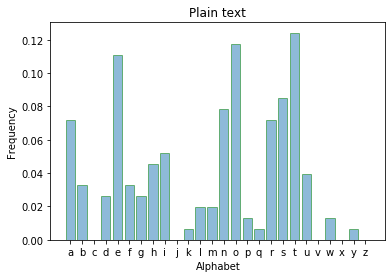

In [23]:
graph_histogram(plaintext, alphabet, title='Plain text')

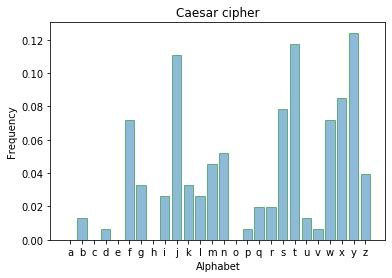

In [24]:
graph_histogram(caesar_encipher(plaintext, 5, alphabet), alphabet, title='Caesar cipher')

---

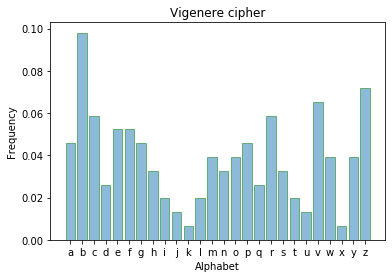

In [25]:
graph_histogram(vigenere_encipher(plaintext, key, alphabet), alphabet, title='Vigenere cipher')

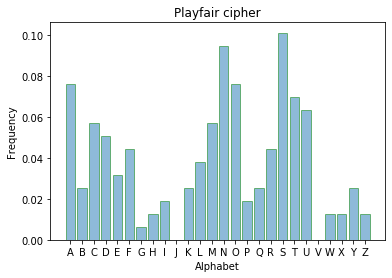

In [26]:
graph_histogram(playfair_encipher(plaintext, key), string.ascii_uppercase, title='Playfair cipher')

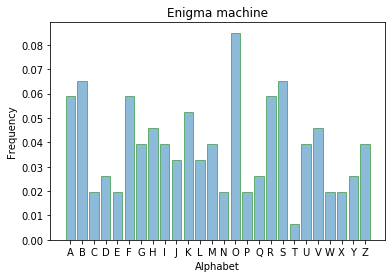

In [27]:
enigma.reset(ring_settings='TWZ')
graph_histogram(enigma.encipher(plaintext), string.ascii_uppercase, title='Enigma machine')